In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [28]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Se hace la lectura de los datos pretratados


In [54]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/dataton2021/train_stdev-2.csv")
df.head()

,Unnamed: 0,id,clase,financieradev,financieramed,comercialdev,comercialmed,mensualdev,mensualmed,anualdev,anualmed,conclusiondev,conclusionmde,otrosdev,otrosmde,profesionalesdev,profesionalesmed,netdev,netomed
0,0,3,0,0.000000,0.000,0.000000,0.00,15196.666667,5698.750,5.355106e+05,756034.750,398660.0,149497.5,0.0,0.0,174.000000,65.250,3.664716e+05,1.084869e+06
1,1,5,0,399919.080949,708552.625,265346.820336,553987.00,82757.000000,31033.875,1.807854e+06,2712311.500,1712680.0,642255.0,0.0,0.0,0.000000,0.000,1.106310e+06,4.039202e+06
2,2,37,0,0.000000,0.000,0.000000,0.00,28561.333333,10710.500,7.156654e+05,1023912.375,482952.0,181107.0,0.0,0.0,6072.000000,2277.000,4.765107e+05,1.436956e+06
3,3,40,2,0.000000,0.000,0.000000,0.00,23666.000000,8874.750,4.821602e+05,689032.125,366456.0,137421.0,0.0,0.0,6429.666667,2411.125,3.426405e+05,9.921057e+05
4,4,45,0,395078.604940,789281.000,361027.848582,642984.75,90642.333333,33990.875,2.169645e+06,3248754.250,1634904.0,613089.0,0.0,0.0,0.000000,0.000,1.402132e+06,4.856975e+06


Se eliminan columnas que no sirven para alimentar la red neuronal


In [55]:
features = df.drop(labels=["id","clase"], axis="columns")
features = features.iloc[: , 1:]
features.head()

,financieradev,financieramed,comercialdev,comercialmed,mensualdev,mensualmed,anualdev,anualmed,conclusiondev,conclusionmde,otrosdev,otrosmde,profesionalesdev,profesionalesmed,netdev,netomed
0,0.000000,0.000,0.000000,0.00,15196.666667,5698.750,5.355106e+05,756034.750,398660.0,149497.5,0.0,0.0,174.000000,65.250,3.664716e+05,1.084869e+06
1,399919.080949,708552.625,265346.820336,553987.00,82757.000000,31033.875,1.807854e+06,2712311.500,1712680.0,642255.0,0.0,0.0,0.000000,0.000,1.106310e+06,4.039202e+06
2,0.000000,0.000,0.000000,0.00,28561.333333,10710.500,7.156654e+05,1023912.375,482952.0,181107.0,0.0,0.0,6072.000000,2277.000,4.765107e+05,1.436956e+06
3,0.000000,0.000,0.000000,0.00,23666.000000,8874.750,4.821602e+05,689032.125,366456.0,137421.0,0.0,0.0,6429.666667,2411.125,3.426405e+05,9.921057e+05
4,395078.604940,789281.000,361027.848582,642984.75,90642.333333,33990.875,2.169645e+06,3248754.250,1634904.0,613089.0,0.0,0.0,0.000000,0.000,1.402132e+06,4.856975e+06


Se genera una gráfica comparativa de todas las variables para poder observar la relación existente entre cada una de estas.

In [56]:

featuresjoint = df.drop(labels=["id"], axis="columns")
featuresjoint = featuresjoint.iloc[: , 1:]


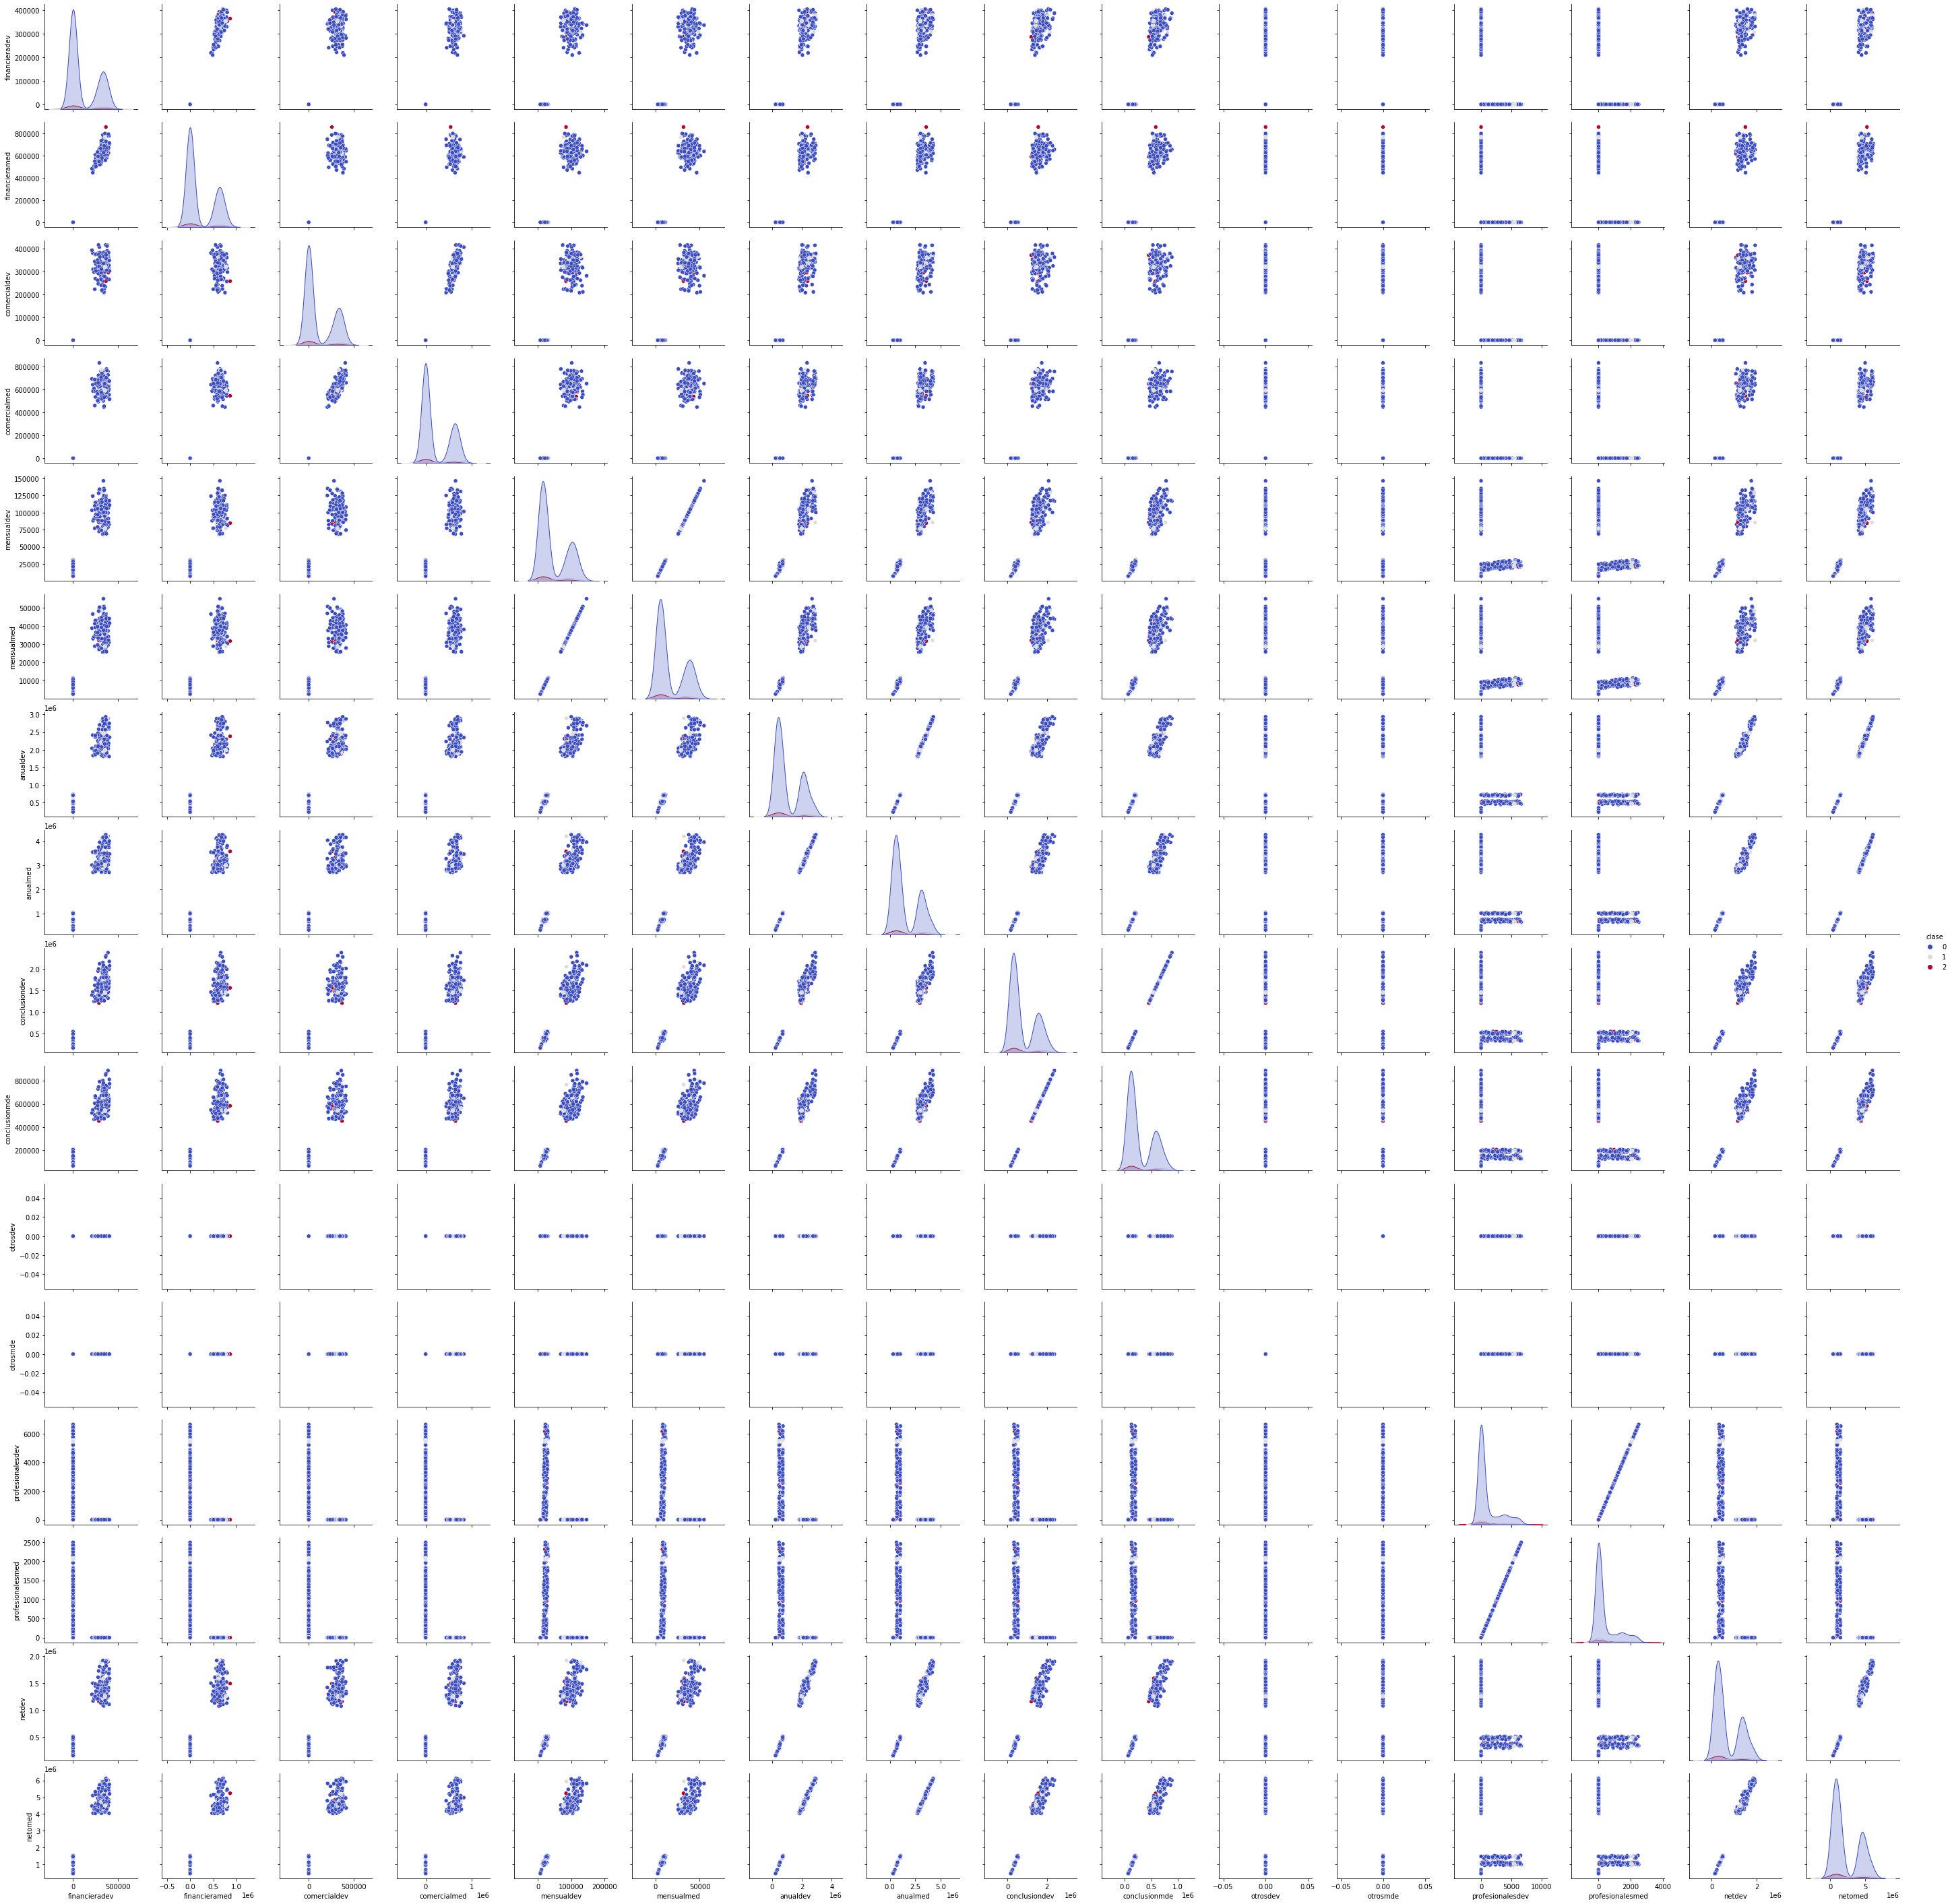

In [57]:
sns.pairplot(featuresjoint, hue='clase', palette="coolwarm")

se preparan los datos para poder alimentar y entrenar una red neuronal.

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()


In [61]:
X = features.values#scaled_data
y = pd.get_dummies(df.clase).values #hacemos el onehotencoding y valores de una vez
X_train, X_test, y_train, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
scaler.fit(X_train)
X_train = np.array(scaler.transform(X_train))
X_test  = scaler.transform(X_test)
type(X_train)

numpy.ndarray

Se crean la morfología de la red neuronal y se entrena.

In [64]:
model = Sequential()

model.add(Dense(4,input_dim=16, activation="relu")) #8 características
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="softmax"))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
xtrain2 = tf.constant(X_train)
ytrain2 = tf.constant(y_train)
xtest2= tf.constant(X_test)
ytest2 = tf.constant(ytest)
history= model.fit(x= xtrain2, y=ytrain2, validation_data=(xtest2, ytest2), batch_size=10, epochs=350)

Epoch 1/350
35/35 [==============================] - 1s 7ms/step - loss: 1.3234 - accuracy: 0.2371 - val_loss: 1.1982 - val_accuracy: 0.1933
Epoch 2/350
35/35 [==============================] - 0s 2ms/step - loss: 1.0917 - accuracy: 0.5057 - val_loss: 1.0283 - val_accuracy: 0.8467
Epoch 3/350
35/35 [==============================] - 0s 3ms/step - loss: 0.9642 - accuracy: 0.9057 - val_loss: 0.9270 - val_accuracy: 0.8867
Epoch 4/350
35/35 [==============================] - 0s 2ms/step - loss: 0.8800 - accuracy: 0.9143 - val_loss: 0.8563 - val_accuracy: 0.8867
Epoch 5/350
35/35 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.9143 - val_loss: 0.7946 - val_accuracy: 0.8867
Epoch 6/350
35/35 [==============================] - 0s 3ms/step - loss: 0.7472 - accuracy: 0.9143 - val_loss: 0.7341 - val_accuracy: 0.8867
Epoch 7/350
35/35 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.9143 - val_loss: 0.6698 - val_accuracy: 0.8867
Epoch 8/350
3

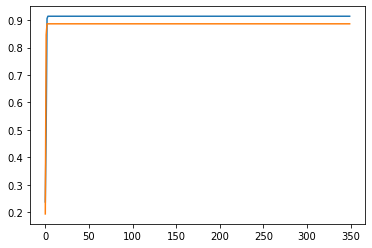

In [66]:
losses = pd.DataFrame(history.history)
losses.accuracy.plot()
losses.val_accuracy.plot()

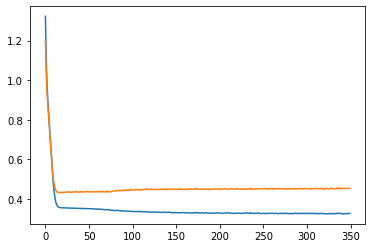

In [67]:
losses.loss.plot()
losses.val_loss.plot()

In [68]:
predictions = model.predict(X_test)
ymess= np.argmax(ytest, axis=1)
predmess = np.argmax(predictions, axis=1)
print(classification_report(ymess,predmess))
result = confusion_matrix(ymess,predmess)
print(result)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       133
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         6

    accuracy                           0.89       150
   macro avg       0.30      0.33      0.31       150
weighted avg       0.79      0.89      0.83       150

[[133   0   0]
 [ 11   0   0]
 [  6   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No concluyente, pero se infieren los siguientes puntos:      
- el preprocesamiento de los datos nos tomo mucho tiempo del necesario para generar una aplicación capaz de reconocer los patrones.
- Es importante tener los datos y propiedades declaradas de los familiares y personas a su alrededor para que se pueda llegar a obtener información.
- la brecha de salarios puede ser un factor importante en la identificación de funcionarios incurriendo en alguna falta.
- un análisis mas detallado de la correlación entre las variables puede llevar a encontrar mas elementos con faltas.
- para llevar un algoritmo supervisado se necesita conocer personas comprabadas sin problemática y una distribución mas homogenea.

